In [1]:
!pip install -q scikit-learn
#파이썬에서 머신러닝을 한다고하면 scikit-learn을 사용한다고 생각하면 된다. 

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(sklearn.__version__)

1.5.1


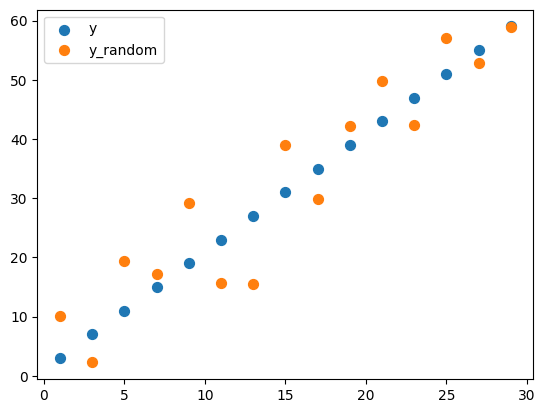

In [19]:
## 회귀분석
np.random.seed(910)
x = np.arange(1, 30, 2) #1부터 30까지 2간격으로 만들겠다.
y = 2*x + 1 # coeff = 2(coefficient), intercept(절편) = 1
y_random  = y + np.random.normal(0 , 8, len(y))


plt.scatter(x, y , s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
# plt.plot(x, yhat, s = 50, label = "yhat")
plt.legend()#범주 표시하기 
plt.show()

In [49]:
# OLS : 최소제곱 추정량 
x_mean = np.mean(x)
y_mean = np.mean(y_random) 
Sxy = sum((x-x_mean)*(y_random - y_mean))
Sxx = sum((x-x_mean)**2)

b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

print("b1 = ", b1.round(3))
print("b0 = ", b0.round(3))

b1 =  1.901
b0 =  3.566


In [51]:
print("y_random= ", y_random.round(1))
print(" yhat =", (b1*y_random + b0).round(1))



y_random=  [10.1  2.3 19.4 17.1 29.2 15.6 15.5 38.9 29.9 42.2 49.7 42.4 57.  52.9
 59. ]
 yhat = [ 22.7   7.9  40.4  36.1  59.1  33.2  33.1  77.6  60.4  83.7  98.1  84.2
 111.9 104.  115.7]


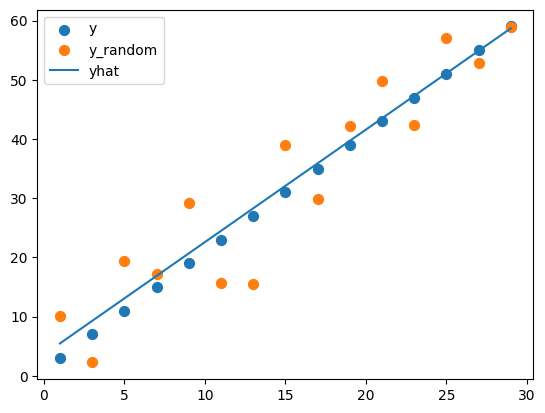

In [57]:
yhat = b1*x + b0

plt.scatter(x, y , s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
plt.plot(x, yhat,  label = "yhat")
plt.legend()#범주 표시하기 
plt.show()


# 이 과정을 라이브러리가 대신 해준다 

In [10]:
## 
from sklearn.linear_model import LinearRegression

In [61]:
x 
## array로 되어있다 
## 이걸 2D로 바꿔줘야된다 받는 형식이 있기 때문에 

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [76]:
x_2d = x.reshape(-1,1)  
# 형태 바꾸기 
# -1은 알아서 변형하라는 뜻? 
# 한 리스트에 3개씩 넣어라
print(x)
print(x_2d)
print(x_2d.shape)
print(x.shape)

[ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]
 [21]
 [23]
 [25]
 [27]
 [29]]
(15, 1)
(15,)


In [82]:
## class instance 만들기 
lr = LinearRegression() #이거 자체가 클래스임

In [83]:
## fitting 
lr.fit(x_2d, y_random)

LinearRegression()

In [84]:
## print
print("coeff =", lr.coef_)
print("intercept =", lr.intercept_)

coeff = [1.90073609]
intercept = 3.566406385768893


In [85]:
## score
lr.score(x_2d, y_random )

0.8679805034799591

In [25]:
## 문제 
'''
cars 자료를 읽고 설명변수 speed와 반응변수 dist를 이용하여 회귀분석을 실시 
'''

cars = pd.read_csv(r'C:\Users\user\Desktop\pandas, seaborn\dataset\cars.csv')
# print(cars)
reshape_speed = cars["speed"].values.reshape(-1,1) # -1 : 행은 자동으로 맞추고, 1 :  열은 1개 
# values는 데이터를 numpy 배열로 변환하는 속성
# reshape()가 numpy배열에만 적용할 수 있기 때문에 바꾼거임
reshape_dist = cars["dist"].values.reshape(-1,1)
# print(reshape_cars) 

car_lr = LinearRegression()
##fitting 
car_lr.fit(reshape_speed, reshape_dist) 
# fit() : 머신러닝 모델을 학습시킬 때 사용하는 매서드
# : 입력 데이터와 목표 데이터를 바탕으로 모델의 내부 파라미터를 최적화시킨다. 
car_lr.score(reshape_speed, reshape_dist)
# score() : 머신러닝 모델의 성능을 평가하는 메서드, 주어진 데이터에 대해 모델이 얼마나 잘 예측하는지 평가 
# : 회귀 분석의 경우 score()는 결정계수 R^2값을 반환 
# : R^2 = 1 : 모델이 데이터를 완벽히 설명 
# : R^2 = 0 : 모델이 데이터를 전혀 설명하지 못함
# : R^2 < 1 : 모델이 데이터보다 더 나쁜 예측을 함

0.6510793807582509

Summary statistic :
        speed   dist
mean     15.0   43.0
std       5.0   26.0
median   15.0   36.0
min       4.0    2.0
max      25.0  120.0


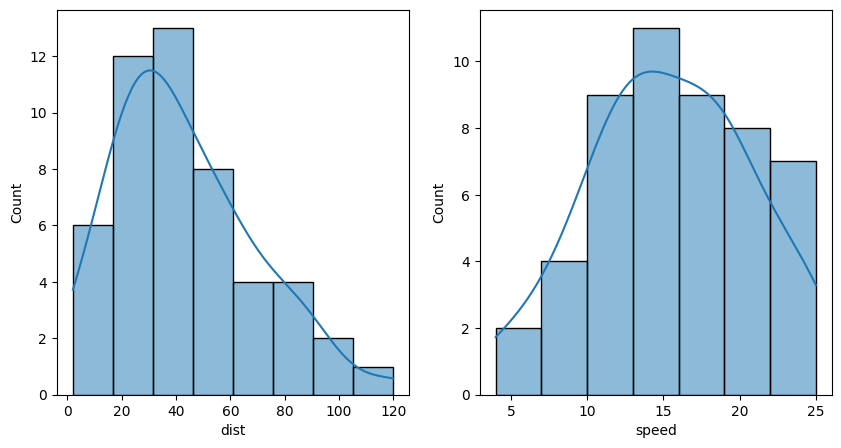

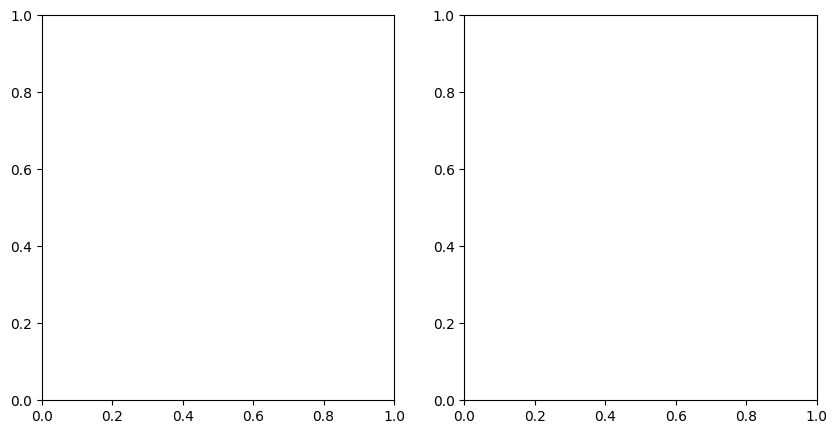

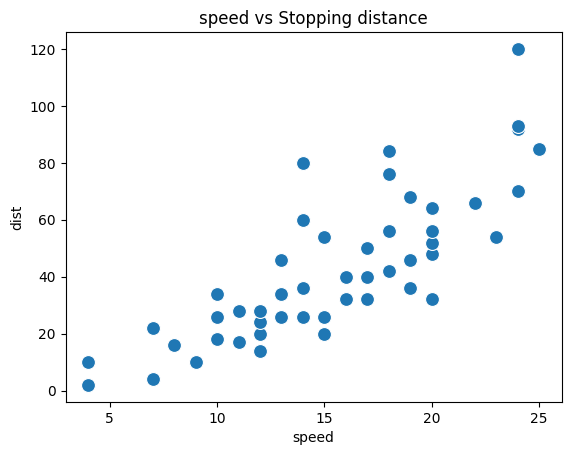

In [62]:
## 교수님 풀이 
cars_df = pd.read_csv(r'C:\Users\user\Desktop\pandas, seaborn\dataset\cars.csv')
## 
print("Summary statistic :")
print(cars_df.agg(["mean", "std", "median", "min","max"]).round()) 

## Graph
fig, axs = plt.subplots(1,2,figsize = (10,5))
sns.histplot(cars_df, x= "dist", ax = axs[0], kde = True)
sns.histplot(cars_df, x= "speed", ax = axs[1], kde = True)
plt.show()

## 
fig, axe = plt.subplots(1,2, figsize = (10,5))
sns.boxplot(cars_df, y = "speed", ax = axs[0])
sns.boxplot(cars_df, y = "speed", ax = axs[0])
sns.stripplot(cars_df, y = "dist", ax = axs[1])
sns.boxplot(cars_df, y = "dist", ax = axs[1])
plt.show()

## 
sns.scatterplot(cars_df, x = "speed", y = "dist", s = 100)
plt.title("speed vs Stopping distance")
plt.show()

In [40]:
print(type(cars_df[["speed"]]))
print(type(cars_df["speed"]))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [39]:
lr = LinearRegression()
lr.fit(cars_df["speed"].values.reshape(-1,1), cars_df["dist"])


LinearRegression()

In [38]:
## 
print("coeff = ", lr.coef_.round(3))
print("intercept=", lr.intercept_.round(3))

coeff =  [3.932]
intercept= -17.579


In [44]:
## score 
print("R-squared = ", round(lr.score(cars_df[["speed"]], cars_df["dist"]), 3))


R-squared =  0.651


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


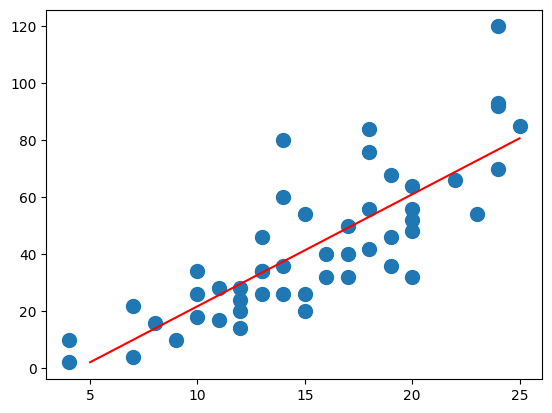

In [50]:
## 
x_line = np.linspace(5, 25, 10)
plt.scatter(x = "speed", y = "dist", data = cars_df, s = 100)
plt.plot(x_line, 3.932*x_line - 17.579, c = "r")
plt.show()

In [75]:
## 
mtcars = pd.read_excel(r'C:\Users\user\Desktop\pandas, seaborn\dataset\mtcars.xlsx')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [84]:
mtcars = mtcars.dropna()
reshape_mpg = mtcars["mpg"] # -1 : 행은 자동으로 맞추고, 1 :  열은 1개 
factor_data = mtcars[["cyl","hp", "drat", "wt", "vs"]]
# reshape_factor = factor_list.values.reshape(-1,1)
car_lr = LinearRegression()
car_lr.fit(factor_data, reshape_mpg) 
score = car_lr.score(factor_data, reshape_mpg)
print(score)

0.8454267039380593
